In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("scopus.csv")

In [3]:
profile = ProfileReport(data, title="Profiling Report")

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [15]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [17]:
titulos = str
for titulo in data["Abstract"]:
    titulos = titulo + " " + str(titulos)
titulos

'Objective: To establish a predictive model of injury risk based on anatomical and functional descriptors with knee and ankle joint instability in non-professional basketball players. Design and participants: Non-experimental, descriptive cross-sectional study, directed sampling; 44 university subjects of both sexes, 27 men (61.4%) and 17 women (38.6%) were evaluated; non-professional basketball players aged between 18 - 26 years (22 ± 3.2), belonging to the sports branch of university basketball in Chile. Results: a) (p = .000) Valgus knee stress establishes a significant association with postural angle in the knee and ankle and functional variables of take off; level of discrimination based model 82% (CC = .820). b) (p = .000) Valgus ankle stress establishes a significant association with the knee and ankle angle, functional variables of take off; level of discrimination based on model 71.3% (CC = .713). c) (p = .000) General risk establishes a significant association with the knee a

In [18]:
stop_words = stopwords.words('english')

In [19]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [20]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [21]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [22]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [23]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
basketball   1562
players      1112
study         881
sports        768
athletes      754
training      748
results       631
injury        546
performance   530
injuries      486

In [24]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

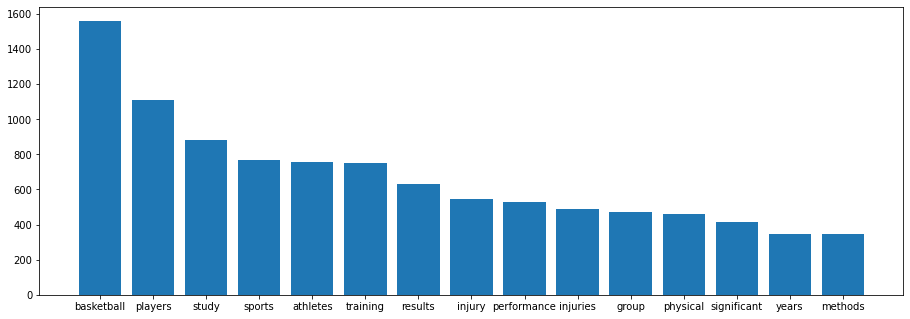

In [25]:
plot_bar(data=df, top=15)

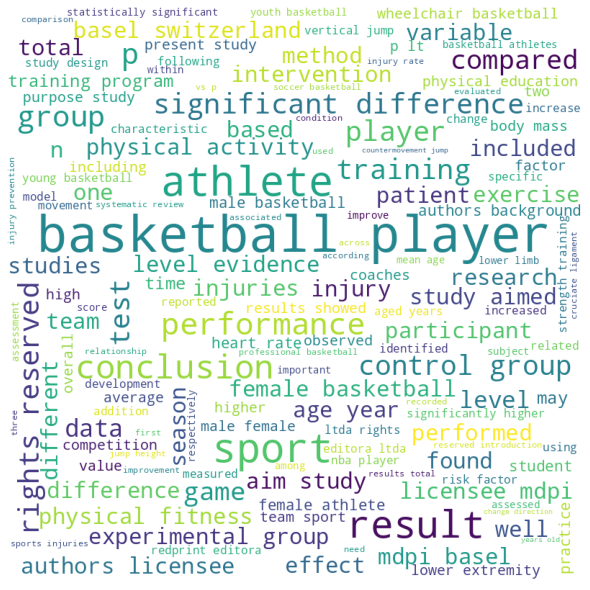

In [26]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
data.head()

Authors  \
0  da Silva G.C.R., Tebar W.R., Saraiva B.T.C., F...   
1  Iwatsu J., Yabe Y., Sekiguchi T., Momma H., Ts...   
2  Gutiérrez-Capote A., Madinabeitia I., Torre E....   
3  Kurz E., Bloch H., Buchholz I., Maier D., Prae...   
4  Csurilla G., Boros Z., Fűrész D.I., Gyimesi A....   

                                        Author(s) ID  \
0  57256954400;57148200400;56979972600;3776124220...   
1  57216391286;55597503800;58094339400;3649732890...   
2  58135672500;57195335009;35788416400;5686875250...   
3  51561895800;57193382686;58091993300;5809199340...   
4  57372608800;57976295000;57218220360;6603395276...   

                                               Title  Year  \
0  Association of Early Sports Practice with Card...  2023   
1  Knee pain in young sports players aged 6–15 ye...  2023   
2  Changes in Perceived Mental Load and Motor Per...  2023   
3  Assessment of return to play after an acute sh...  2023   
4  How Much Is Winning a Matter of Luck? A Compar...  2023   

                                        Source title  Volume Issue Art. No.  \
0                             Sports Medicine - Open     9.0     1       15   
1    BMC Sports Science, Medicine and Rehabilitation    15.0     1       16   
2  International Journal of Environmental Researc...    20.0     5     4664   
3                                           BMJ Open    13.0     2  e067073   
4  International Journal of Environmental Researc...    20.0     4     2911   

  Page start Page end  ...                                       Affiliations  \
0        NaN      NaN  ...  Department of Physical Education, School of Te...   
1        NaN      NaN  ...  Department of Orthopaedic Surgery, Tohoku Univ...   
2        NaN      NaN  ...  Department of Physical Education and Sport, Fa...   
3        NaN      NaN  ...  Department of Orthopedic and Trauma Surgery, M...   
4        NaN      NaN  ...  Institute of Economics, Centre for Economic an...   

                           Authors with affiliations  \
0  da Silva, G.C.R., Department of Physical Educa...   
1  Iwatsu, J., Department of Orthopaedic Surgery,...   
2  Gutiérrez-Capote, A., Department of Physical E...   
3  Kurz, E., Department of Orthopedic and Trauma ...   
4  Csurilla, G., Institute of Economics, Centre f...   

                                            Abstract  \
0  Background: Sports practice in childhood and a...   
1  Background: Knee is the most commonly injured ...   
2  Background: Attentional resource allocation du...   
3  Introduction To date, there is no valid single...   
4  Background: The comparison of team sports base...   

                                     Author Keywords  \
0  Cardiometabolic; Health; Motor behavior; Physi...   
1  Knee pain; Sports discipline; Young sports pla...   
2  basketball; mental load; motor performance; mo...   
3  Orthopaedic sports trauma; REHABILITATION MEDI...   
4  chance; competitive balance; International Bas...   

                                      Index Keywords Document Type  \
0  accelerometry; adult; Article; athletics; bask...       Article   
1  adolescent; age; Article; athlete; baseball; b...       Article   
2  adult; article; athlete; basketball; clinical ...       Article   
3  acute disease; adult; anthropometry; Article; ...       Article   
4  adult; article; basketball; competition; contr...       Article   

  Publication Stage Open Access  Source                 EID  
0             Final         NaN  Scopus  2-s2.0-85148737601  
1             Final         NaN  Scopus  2-s2.0-85147560501  
2             Final         NaN  Scopus  2-s2.0-85149758844  
3             Final         NaN  Scopus  2-s2.0-85147457618  
4             Final         NaN  Scopus  2-s2.0-85148963931  

[5 rows x 24 columns]